In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# assamble data to a DataFrame
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
# export as csv
df.to_csv("iris.csv", encoding='utf-8', index=False)

In [5]:
import seaborn as sns

In [6]:
# 使用相關係數矩陣當input ... 畫heatmap
# 用 df.corr() 計算得到相關係數矩陣
cor = df.astype("float").corr() # astype轉浮點數

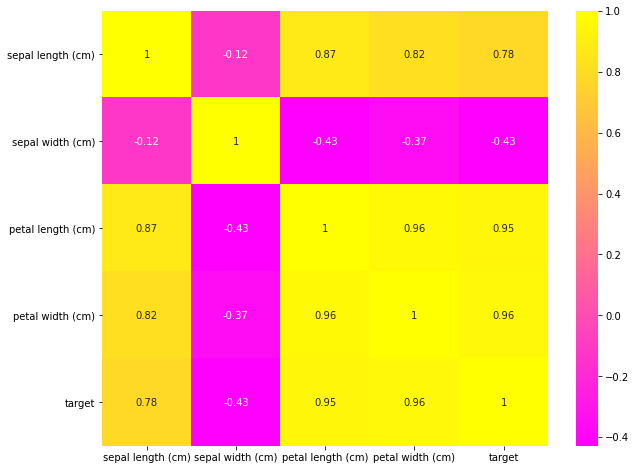

In [7]:
plt.figure(figsize=(10, 8))    # 調整繪圖大小
sns.heatmap(cor, cmap='spring', annot=True)  # cmap套用色彩, annot標註數值在圖上

In [8]:
from sklearn.model_selection import train_test_split

# df.drop 回傳新的，不改舊的
x_train, x_test, y_train, y_test = train_test_split(df.drop(["target"], axis=1), df["target"], test_size=0.2)

In [9]:
from sklearn.tree import DecisionTreeClassifier

#clf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

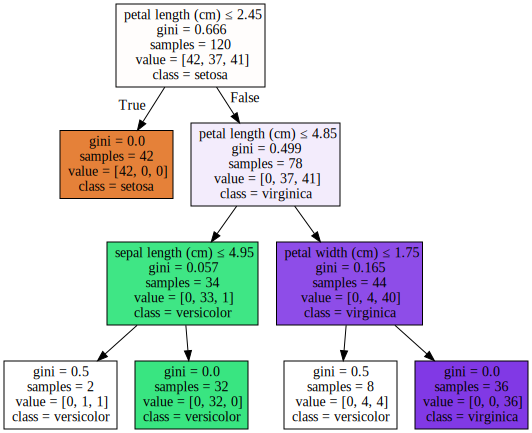

In [15]:
from sklearn.tree import export_graphviz
import graphviz

g = export_graphviz(clf, 
                    out_file=None, 
                    feature_names=iris["feature_names"],
                    class_names=iris["target_names"],
                    special_characters=True,
                    filled=True)
graph = graphviz.Source(g)
graph

In [11]:
pre = clf.predict(x_test)
print('predict: ', list(pre))
print('reality: ', list(y_test))

predict:  [1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1]
reality:  [1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1]


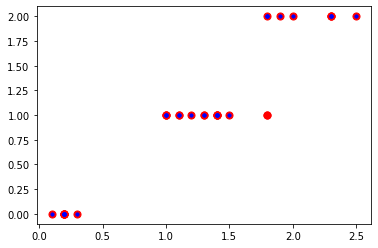

In [12]:
plt.scatter(list(x_test['petal width (cm)']), list(pre), color='r', s=50)
plt.scatter(list(x_test['petal width (cm)']), list(y_test), color='b', s=10)

---
## 衡量預測好壞
### 使用`sklearn.metrics`
* adduracy_score
* confusion_matrix

Ref: https://scikit-learn.org/stable/modules/model_evaluation.html

In [13]:
from sklearn.metrics import accuracy_score

score = str(accuracy_score(pre, y_test) * 100)[:5] + ' %'
print("成功率:", score)

成功率: 93.33 %


In [14]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, pre)) # 矩陣中對角線以外出現的代表預測錯誤

,0,1,2
0,8,0,0
1,0,13,0
2,0,2,7


## Classification Tree
* __亂度__：雜亂度計算... 最亂=1, 最不亂=0 （gini 係數）
* 每次分割需要往亂度最低的方向前進
* 增益計算 = Old_E - New_E ... 增益最大=1, 增益最小=0 （概念與亂度相反）

---

### 欠擬合 --> 擬合 --> 過擬合
> Depth太小 --> Depth剛好 --> Depth太深

#### 預防過擬合
1. 先「剪枝」
2. 後「剪枝」 ... sklearn不支援

#### Depth決定策略
* 經驗法則 ... 3或5
> clf = DecisionTreeClassifier(max_depth=3)
* 窮舉法(experience best)

## 決策樹優點
* 解釋性高
* 依賴經驗法則